In [1]:
# import needed resource
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import inflection as inf
#!pip install inflection

In [2]:
#import datafile
df = pd.read_csv(r"C:\Users\user\Downloads\500_keywords.csv")
df.head()

,keywords_from_comments,Frequency,Categorization
0,room,6696,c
1,hotel,5356,e
2,staff,4697,e
3,service,4640,e
4,stay,4455,e


a	Celebration
b	Dining
c	Facilities
d	Views/ Environment
e	Cannot classified



In [3]:
#remove all punctuations in the keywords
df['keywords'] = df['keywords_from_comments'].str.replace('[^\w\s]', '')
#transform all keywords into lowercase
df["keywords"] = df["keywords"].str.lower()
#check output
df.head(50)

<ipython-input-3-d7edc6015f35>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['keywords'] = df['keywords_from_comments'].str.replace('[^\w\s]', '')


,keywords_from_comments,Frequency,Categorization,keywords
0,room,6696,c,room
1,hotel,5356,e,hotel
2,staff,4697,e,staff
3,service,4640,e,service
4,stay,4455,e,stay
5,great,3211,e,great
6,birthday,2802,a,birthday
7,food,2765,b,food
8,time,2739,e,time
9,good,2696,e,good


In [4]:
#singularize the keywords
df['keywords'] = df['keywords'].apply(lambda x: ' '.join([inf.singularize(item) for item in x.split()]))

In [5]:
#identify missing cases since some keywords is just punctuation e.g. the 18th
df["keywords"]=df["keywords"].replace('', np.nan)
df.head(30)

,keywords_from_comments,Frequency,Categorization,keywords
0,room,6696,c,room
1,hotel,5356,e,hotel
2,staff,4697,e,staff
3,service,4640,e,service
4,stay,4455,e,stay
5,great,3211,e,great
6,birthday,2802,a,birthday
7,food,2765,b,food
8,time,2739,e,time
9,good,2696,e,good


In [6]:
#drop missing cases since some keywords is just punctuation e.g. the 18th
df=df.dropna(axis = 0, how ='any')
df.head(20)

,keywords_from_comments,Frequency,Categorization,keywords
0,room,6696,c,room
1,hotel,5356,e,hotel
2,staff,4697,e,staff
3,service,4640,e,service
4,stay,4455,e,stay
5,great,3211,e,great
6,birthday,2802,a,birthday
7,food,2765,b,food
8,time,2739,e,time
9,good,2696,e,good


In [7]:
#drop the column of original keywords (with punctuations)
to_drop = ['keywords_from_comments']
df.drop(columns=to_drop, inplace=True) 
df.head()

,Frequency,Categorization,keywords
0,6696,c,room
1,5356,e,hotel
2,4697,e,staff
3,4640,e,service
4,4455,e,stay


In [8]:
#find the no. of duplicated keywords
df.duplicated(subset=['keywords']).sum()

107

In [9]:
#just a quick idea of what keywords is duplicated
df.loc[df.duplicated(subset=['keywords']), :]

,Frequency,Categorization,keywords
34,1375,e,thank
42,1099,e,thank
50,971,e,hotel
54,923,e,stay
58,902,e,hotel
...,...,...,...
470,183,e,great
471,182,c,pool
478,178,e,experience
494,173,e,good


In [10]:
#sum the duplicated keywords
df['Total'] = df.groupby(['keywords'])['Frequency'].transform('sum')
df.head()

,Frequency,Categorization,keywords,Total
0,6696,c,room,9468
1,5356,e,hotel,8455
2,4697,e,staff,6481
3,4640,e,service,7419
4,4455,e,stay,5784


In [11]:
#sort the no. of keywords descendingly
df = df. sort_values(by=["Total"], ascending=False)
df_20=df.head(20)
df_20

,Frequency,Categorization,keywords,Total
0,6696,c,room,9468
128,563,c,room,9468
89,705,c,room,9468
107,644,c,room,9468
61,860,e,room,9468
1,5356,e,hotel,8455
91,702,e,hotel,8455
58,902,e,hotel,8455
140,524,e,hotel,8455
50,971,e,hotel,8455


In [12]:
#we would like to keep the keywords appear first
df.loc[df.duplicated(keep='first'), :]

,Frequency,Categorization,keywords,Total
443,199,e,member,398


In [13]:
#drop duplicated case
df=df.drop_duplicates(subset=['keywords'])
df.head(20)

,Frequency,Categorization,keywords,Total
0,6696,c,room,9468
1,5356,e,hotel,8455
452,193,e,service,7419
2,4697,e,staff,6481
54,923,e,stay,5784
42,1099,e,thank,5002
214,383,e,great,4045
303,280,d,view,3978
151,500,e,time,3771
365,238,b,food,3702


In [14]:
#drop original frequecy since we do not need it now
to_drop = ['Frequency']
df.drop(columns=to_drop, inplace=True) 
df.head()

,Categorization,keywords,Total
0,c,room,9468
1,e,hotel,8455
452,e,service,7419
2,e,staff,6481
54,e,stay,5784


In [15]:
#df.to_csv(r'C:\Users\user\Downloads\500_keywords_cleaned.csv', index = False)
#export file when needed

In [16]:
df_20=df.head(20)
df_20

,Categorization,keywords,Total
0,c,room,9468
1,e,hotel,8455
452,e,service,7419
2,e,staff,6481
54,e,stay,5784
42,e,thank,5002
214,e,great,4045
303,d,view,3978
151,e,time,3771
365,b,food,3702


<AxesSubplot:title={'center':'Top 20 keywords'}, xlabel='keywords'>

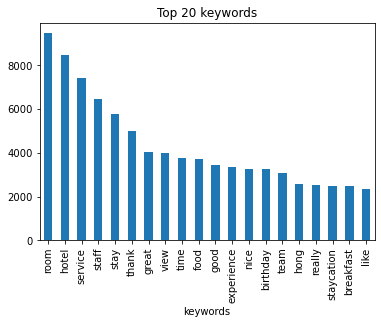

In [17]:
df_20.plot(kind='bar',
                     x='keywords',
                     y='Total',
                     title='Top 20 keywords',
                     legend=False)

In [18]:
sums = df.groupby(df["Categorization"]).count()
sums

,keywords,Total
Categorization,,
a,8,8
b,21,21
c,17,17
d,5,5
e,335,335


In [19]:
pra=[335,(8+21+17+5)]
pra_class=["uncategorized","categorized"]
colors = ["#E6F69D", "#AADEA7", "#64C2A6", "#3CB3C0","#2D87BB","#024064"]

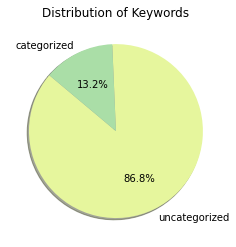

In [20]:
plt.pie(pra,labels=pra_class, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Distribution of Keywords")
plt.show()

In [21]:
count_data = [8,21,17,5]
class_data= ["Celebration","Dining","Facilities","Views/ Environment"]
colors = ["#E6F69D", "#AADEA7", "#64C2A6", "#3CB3C0","#2D87BB","#024064"]

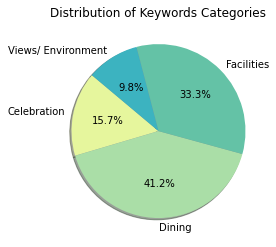

In [22]:
plt.pie(count_data,labels=class_data, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Distribution of Keywords Categories")
plt.show()

In [23]:
df_a = df[df['Categorization'] == 'a']
df_b = df[df['Categorization'] == 'b']
df_c = df[df['Categorization'] == 'c']
df_d = df[df['Categorization'] == 'd']

In [24]:
#check categorized keywords
df_a,df_b,df_c,df_d

(    Categorization     keywords  Total
 162              a     birthday   3277
 51               a    celebrate    939
 56               a         cake    910
 382              a  anniversary    845
 122              a  celebration    838
 103              a     surprise    657
 118              a      wedding    598
 276              a  celebrating    300,
     Categorization    keywords  Total
 365              b        food   3702
 460              b   breakfast   2472
 389              b      dinner   1828
 46               b  restaurant   1559
 44               b      dining   1061
 47               b         tea   1011
 352              b    deliciou    889
 72               b      buffet    765
 425              b       drink    609
 126              b       lunch    565
 150              b      inroom    500
 179              b        cafe    434
 222              b        wine    374
 244              b        menu    340
 275              b   chocolate    301
 313           

In [25]:
#change misspelled keywords
df_b=df_b.replace('deliciou', 'delicious')
df_d=df_d.replace('victorium',  'victoria')
df_b, df_d

(    Categorization    keywords  Total
 365              b        food   3702
 460              b   breakfast   2472
 389              b      dinner   1828
 46               b  restaurant   1559
 44               b      dining   1061
 47               b         tea   1011
 352              b   delicious    889
 72               b      buffet    765
 425              b       drink    609
 126              b       lunch    565
 150              b      inroom    500
 179              b        cafe    434
 222              b        wine    374
 244              b        menu    340
 275              b   chocolate    301
 313              b       water    270
 319              b        dish    267
 400              b       taste    217
 404              b   champagne    215
 432              b      coffee    202
 439              b        meal    200,
     Categorization     keywords  Total
 303              d         view   3978
 217              d      harbour   1135
 178              d  

<AxesSubplot:title={'center':'Celebration keywords'}, xlabel='keywords'>

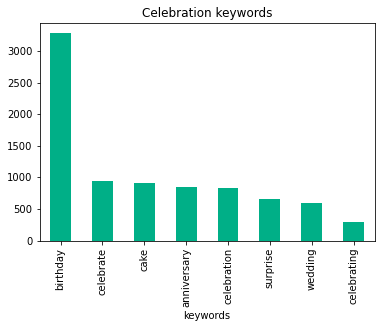

In [26]:
df_a.plot(kind='bar',
                     x='keywords',
                     y='Total',
                    color="#00AF87",
                     title='Celebration keywords',
                     legend=False)

<AxesSubplot:title={'center':'Top 15 Dining keywords '}, xlabel='keywords'>

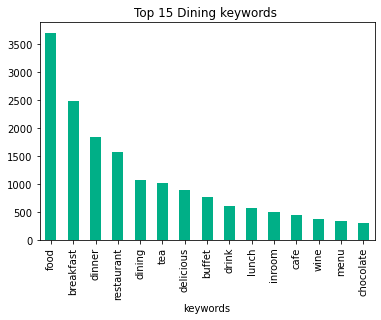

In [27]:
df_b.head(15).plot(kind='bar',
                     x='keywords',
                     y='Total',
                   color="#00AF87",
                     title='Top 15 Dining keywords ',
                     legend=False)

<AxesSubplot:title={'center':'Top 15 Facilities keywords'}, xlabel='keywords'>

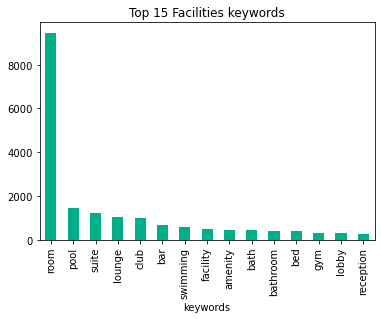

In [28]:
df_c.head(15).plot(kind='bar',
                     x='keywords',
                     y='Total',
                   color="#00AF87",
                     title='Top 15 Facilities keywords',
                     legend=False)

<AxesSubplot:title={'center':'Views/ Environment keywords'}, xlabel='keywords'>

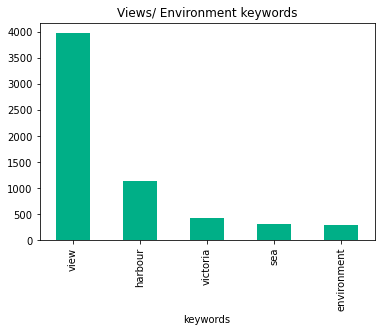

In [29]:
df_d.plot(kind='bar',
                     x='keywords',
                     y='Total',
                    color="#00AF87",
                     title='Views/ Environment keywords',
                     legend=False)